# Principle component analysis (PCA)

### Manual PCA
**Manual linear regression transofrmations** (the code written in `modules` for matrix inversion works but is slow, so `np.linalg.inv` is used instead)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

from pca import PCA

### Dataset 
<br>
Generate random data with some degree of correlation, otherwise the covariance is very low and the transformation provides data that is highly similar to the original one.

In [2]:
size = 100
x=np.random.normal(0,1,size)
y=x/5+np.random.normal(0,1,size)
z=x/10+y/5+np.random.normal(0,1,size)
w=x/20+y/10+z/5+np.random.normal(0,1,size)

M = np.concatenate((x,y,z,w)).reshape(4,size).T

### PCA

**Reduce dimentionality from n=4 to k=2**

In [3]:
k = 2
pca = PCA()
pca.fit(M)
reduced = pca.reduce_dimensionality(M,k)

**Show eigenvectors and eigenvalues**

In [4]:
pca.vectors

array([[-0.6332, -0.5331, -0.4889, -0.2755],
       [ 0.3795,  0.3917, -0.5748, -0.6101],
       [-0.0542,  0.2646, -0.6291,  0.7289],
       [-0.6724,  0.7017,  0.1867, -0.1436]])

PC1 is mostly `x`
<br>
PC2 is mostly `w`

In [5]:
pca.values

array([1.9979, 1.2252, 0.7805, 0.6061])

### Visualize data

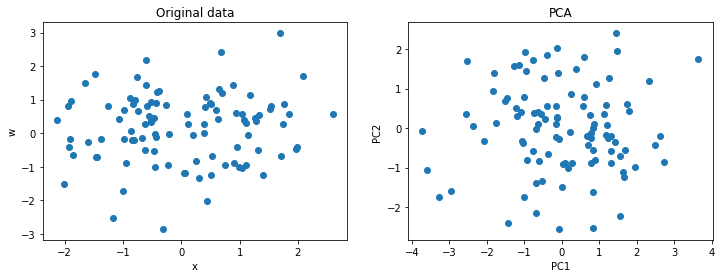

In [6]:
fig,axes = plt.subplots(ncols=2,figsize = (12,4))

# original data
axes[0].scatter(M[:,0],M[:,3])
axes[0].set_title('Original data')
axes[0].set_xlabel('x')
axes[0].set_ylabel('w')

# transformed data
axes[1].scatter(reduced[:,0],reduced[:,1])
axes[1].set_title('PCA')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')

plt.show()

### Compare to `np.linalg`

In [7]:
# get eigenvectors and eigenvalues
eigen_values,eigen_vectors = np.linalg.eig(np.cov(M.T))
# sort by eigenvalue
rank = np.argsort(eigen_values)[::-1]
# use top 2
W = eigen_vectors[:,rank[:k]]
# transform data
np_T = np.dot(M-M.mean(axis=0),W)

**Check if transformed data is the same**

In [8]:
(np.round(np_T-reduced,4)==0).sum()/np_T.size

0.5

Hmmm, this is not what we expected... Let's check the eigenvectors

In [9]:
# linalg eigenvectors
W.T

array([[ 0.6332,  0.5331,  0.4889,  0.2755],
       [ 0.3795,  0.3917, -0.5748, -0.6101]])

In [10]:
# manual eigenvectors
pca.vectors[:2]

array([[-0.6332, -0.5331, -0.4889, -0.2755],
       [ 0.3795,  0.3917, -0.5748, -0.6101]])

**Important note: the sign of an eigenvectors can be reversed. The transformation would be different, but the captures variance would still be correct**

**Thus, when comparing different methods, one can manually flip eigenvectors as needed**

In [11]:
# flip vectors
W[:,0] = -W[:,0]
np_T = np.dot(M-M.mean(axis=0),W)
(np.round(np_T-reduced,4)==0).sum()/np_T.size

1.0

### Restore data

Transform the tranformed data from k=2 dimensions, back to n=4 dimensions

In [12]:
restored = pca.restore_dimensionality(reduced)

Now compare to the original data

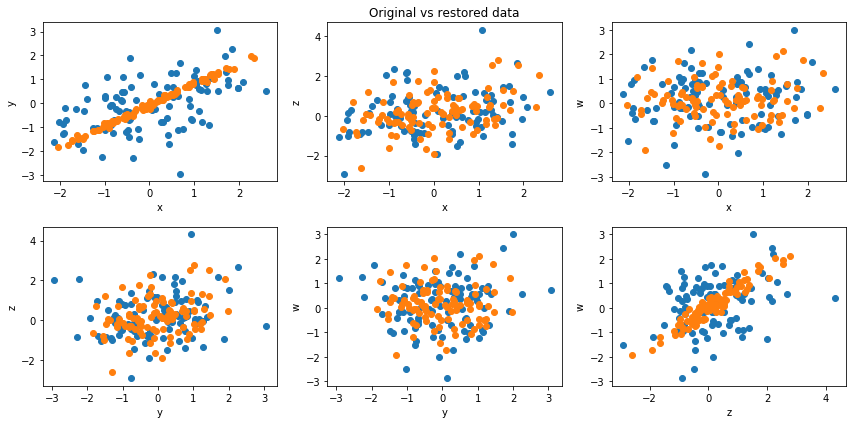

In [13]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize = (12,6))

axes[0,1].set_title('Original vs restored data')

label={1:'y',2:'z',3:'w'}

for i in range(3):
    # original data
    axes[0,i].scatter(M[:,0],M[:,i+1])
    axes[0,i].set_xlabel('x')
    axes[0,i].set_ylabel(label[i+1])
    # restored data
    axes[0,i].scatter(restored[:,0],restored[:,i+1])
    
for i in range(2):
    # original data
    axes[1,i].scatter(M[:,1],M[:,i+2])
    axes[1,i].set_xlabel('y')
    axes[1,i].set_ylabel(label[i+2])
    # restored data
    axes[1,i].scatter(restored[:,1],restored[:,i+2])

# original data
axes[1,2].scatter(M[:,2],M[:,3])
axes[1,2].set_xlabel('z')
axes[1,2].set_ylabel('w')
# restored data
axes[1,2].scatter(restored[:,2],restored[:,3])

plt.tight_layout()

plt.show()

**Some of the data was lost, and can be traced back to which columns were the least represented in the first 2 eigenvectors**